<a href="https://colab.research.google.com/github/aeroscissorz/Computer_Vision/blob/main/computer_vision_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. RGB(219, 223, 222)
2. RGB(188, 197, 212)
3. RGB(106, 96, 112)
4. RGB(49, 168, 207)
5. RGB(97, 218, 243)
6. RGB(72, 147, 118)
7. RGB(163, 151, 151)
8. RGB(74, 106, 155)
9. RGB(76, 81, 66)
10. RGB(48, 33, 7)
11. RGB(140, 117, 139)
12. RGB(192, 189, 168)
13. RGB(117, 49, 100)
14. RGB(38, 31, 58)
15. RGB(140, 148, 206)


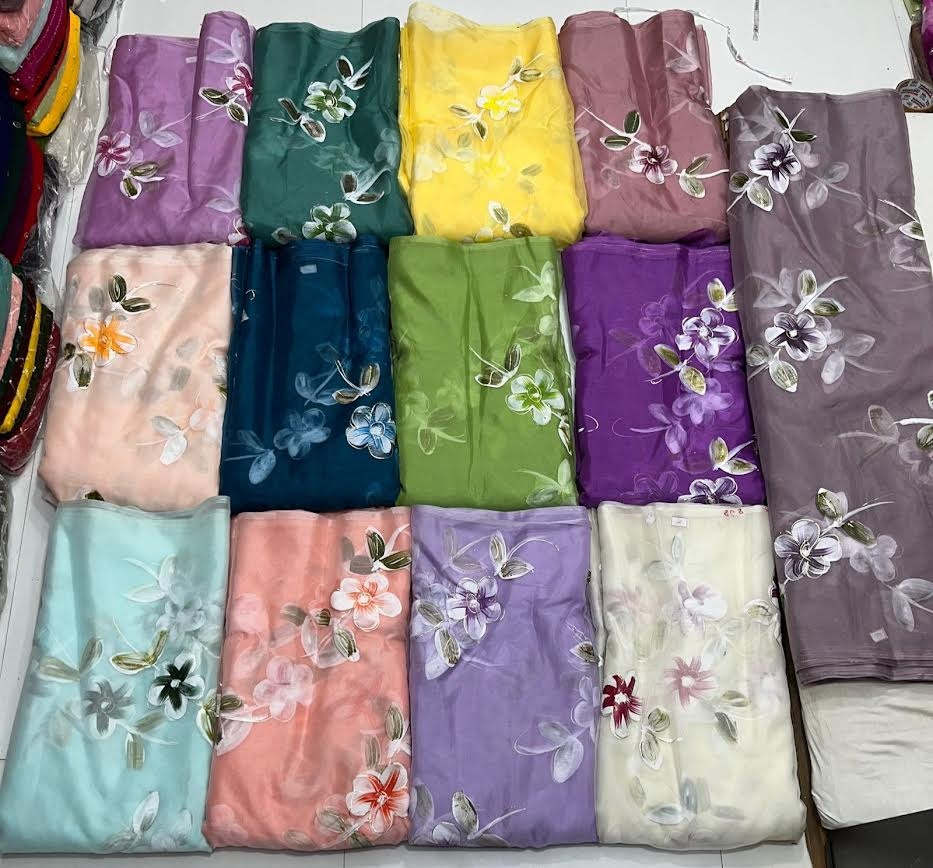

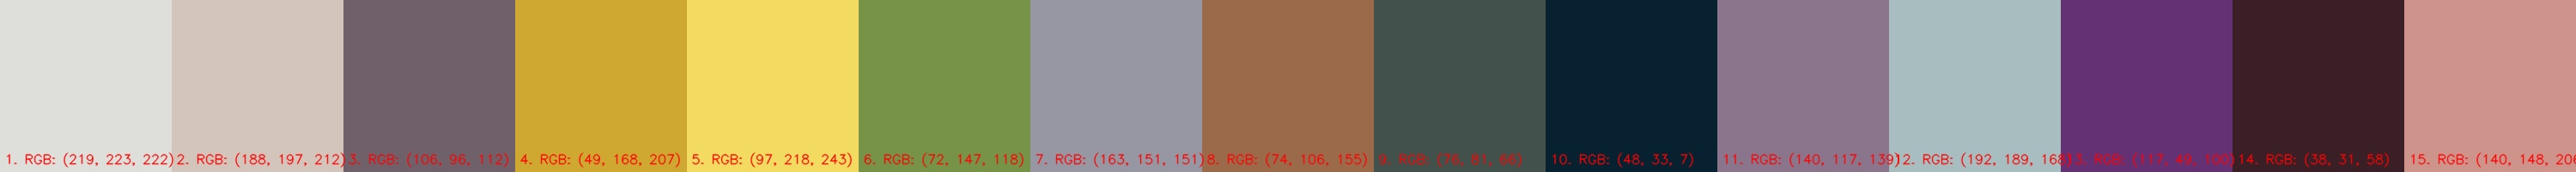

In [ ]:
import cv2
import numpy as np
from IPython.display import Image, display

def create_bar(height, width, color):
    """
    Create a color bar with the specified dimensions and color.

    Parameters:
    - height: Height of the color bar.
    - width: Width of the color bar.
    - color: RGB color tuple.

    Returns:
    - bar: Color bar image.
    - rgb: RGB values of the color.
    """
    bar = np.zeros((height, width, 3), np.uint8)
    bar[:] = color
    red, green, blue = int(color[2]), int(color[1]), int(color[0])
    return bar, (red, green, blue)

# Load the image
img = cv2.imread('/content/Image/image_group.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Get image dimensions
height, width, _ = np.shape(img)

# Reshape the image for k-means clustering
data = np.reshape(img, (height * width, 3))
data = np.float32(data)

# Perform k-means clustering to find dominant colors
number_clusters = 15
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness, labels, centers = cv2.kmeans(data, number_clusters, None, criteria, 10, flags)

# Font for adding text to the color bars
font = cv2.FONT_HERSHEY_SIMPLEX

# Initialize lists to store color bars and RGB values
bars = []
rgb_values = []

# Create color bars and extract RGB values
for index, row in enumerate(centers):
    bar, rgb = create_bar(200, 200, row)
    bars.append(bar)
    rgb_values.append(rgb)

# Concatenate color bars horizontally
img_bar = np.hstack(bars)

# Add RGB values as text to the color bars
for index, row in enumerate(rgb_values):
    img_bar = cv2.putText(img_bar, f'{index + 1}. RGB: {row}', (5 + 200 * index, 200 - 10),
                          font, 0.5, (255, 0, 0), 1, cv2.LINE_AA)
    print(f'{index + 1}. RGB{row}')

# Save the images to temporary files
cv2.imwrite('/content/original_image.jpg', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
cv2.imwrite('/content/dominant_colors.jpg', cv2.cvtColor(img_bar, cv2.COLOR_RGB2BGR))

# Display the original image
display(Image(filename='/content/original_image.jpg'))

# Display the dominant colors image
display(Image(filename='/content/dominant_colors.jpg'))


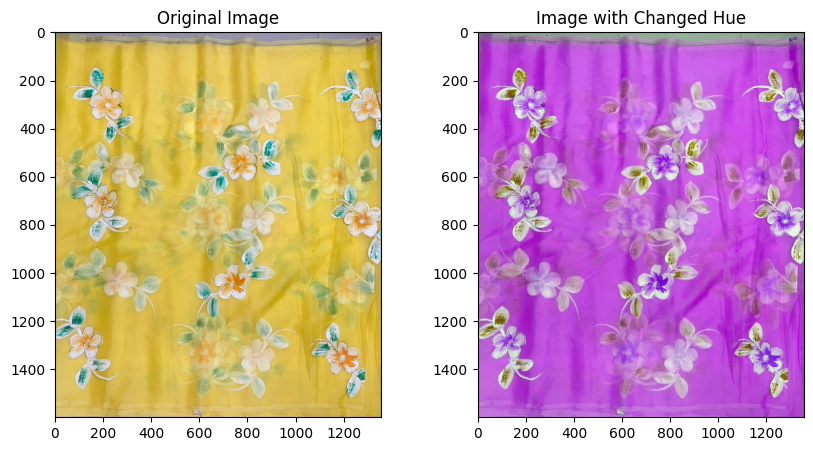

In [ ]:
import cv2
import numpy as np
from skimage.color import rgb2hsv, hsv2rgb
import matplotlib.pyplot as plt

def change_hue(image, target_hue):
    """
    Change the hue of the dominant color in the image.

    Parameters:
    - image: Input image in RGB format.
    - target_hue: Target hue value for the dominant color.

    Returns:
    - image_hue_changed: Image with the hue of the dominant color changed.
    """
    # Convert image to HSV color space
    image_hsv = rgb2hsv(image)

    # Extract hue channel
    hue_channel = image_hsv[:, :, 0]

    # Estimate the dominant hue using the mean
    dominant_hue = int(np.mean(hue_channel))

    # Calculate the hue shift needed
    hue_shift = target_hue - dominant_hue

    # Apply hue shift to the entire image
    hue_channel_shifted = (hue_channel + hue_shift) % 180

    # Update the hue channel in the HSV image
    image_hsv[:, :, 0] = hue_channel_shifted

    # Convert back to RGB color space
    image_hue_changed = hsv2rgb(image_hsv)

    return image_hue_changed

# Load the image
img_path = '/content/Image/image_single.jpg'
img = cv2.imread(img_path)

# Check if the image is loaded successfully
if img is None:
    raise FileNotFoundError(f"Error: Unable to load image from path: {img_path}")

# Convert the image to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Get image dimensions
height, width, _ = np.shape(img_rgb)

# Reshape the image for k-means clustering
data = np.reshape(img_rgb, (height * width, 3))
data = np.float32(data)

# Perform k-means clustering to find dominant colors
number_clusters = 1
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
_, _, centers = cv2.kmeans(data, number_clusters, None, criteria, 10, flags)

# Get the dominant color
dominant_color = centers[0]

# Change the hue of the dominant color to blue (target hue)
target_hue = 120  # Blue hue value
img_hue_changed = change_hue(img_rgb, target_hue)

# Display both the original and modified images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')

# Image with changed hue
plt.subplot(1, 2, 2)
plt.imshow(img_hue_changed)
plt.title('Image with Changed Hue')

plt.show()


In [ ]:
import cv2
import numpy as np
from skimage.color import rgb2hsv, hsv2rgb
import matplotlib.pyplot as plt

def create_bar(height, width, color):
    """
    Create a color bar with the specified dimensions and color.

    Parameters:
    - height: Height of the color bar.
    - width: Width of the color bar.
    - color: RGB color tuple.

    Returns:
    - bar: Color bar image.
    - rgb: RGB values of the color.
    """
    bar = np.zeros((height, width, 3), np.uint8)
    bar[:] = color
    red, green, blue = int(color[2]), int(color[1]), int(color[0])
    return bar, (red, green, blue)

def change_hue(image, target_hue):
    """
    Change the hue of the dominant color in the image.

    Parameters:
    - image: Input image in RGB format.
    - target_hue: Target hue value for the dominant color.

    Returns:
    - image_hue_changed: Image with the hue of the dominant color changed.
    """
    # Convert image to HSV color space
    image_hsv = rgb2hsv(image)

    # Extract hue channel
    hue_channel = image_hsv[:, :, 0]

    # Estimate the dominant hue using the mean
    dominant_hue = int(np.mean(hue_channel))

    # Calculate the hue shift needed
    hue_shift = target_hue - dominant_hue

    # Apply hue shift to the entire image
    hue_channel_shifted = (hue_channel + hue_shift) % 180

    # Update the hue channel in the HSV image
    image_hsv[:, :, 0] = hue_channel_shifted

    # Convert back to RGB color space
    image_hue_changed = hsv2rgb(image_hsv)

    return image_hue_changed

# Load the image for extracting dominant colors
img_group = cv2.imread('/content/Image/image_group.jpg')
img_group = cv2.cvtColor(img_group, cv2.COLOR_BGR2RGB)

# Get image dimensions
height_group, width_group, _ = np.shape(img_group)

# Reshape the image for k-means clustering
data_group = np.reshape(img_group, (height_group * width_group, 3))
data_group = np.float32(data_group)

# Perform k-means clustering to find dominant colors
number_clusters = 15
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
_, _, centers_group = cv2.kmeans(data_group, number_clusters, None, criteria, 10, flags)

# Display dominant colors
bars_group = [create_bar(200, 200, color)[0] for color in centers_group]
img_bars_group = np.hstack(bars_group)
plt.imshow(img_bars_group)
plt.title('Dominant Colors')
plt.show()

# Load the image for changing hues
img_single = cv2.imread('/content/Image/image_single.jpg')
img_single_rgb = cv2.cvtColor(img_single, cv2.COLOR_BGR2RGB)

# Change hues and display results
for i, dominant_color in enumerate(centers_group):
    target_hue = dominant_color[0]  # Use the dominant color's hue as the target hue
    img_hue_changed = change_hue(img_single_rgb, target_hue)

    # Display both the original and modified images
    plt.figure(figsize=(10, 5))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(img_single_rgb)
    plt.title('Original Image')

    # Image with changed hue
    plt.subplot(1, 2, 2)
    plt.imshow(img_hue_changed)
    plt.title(f'Image with Changed Hue - Dominant Color {i + 1}')

    plt.show()


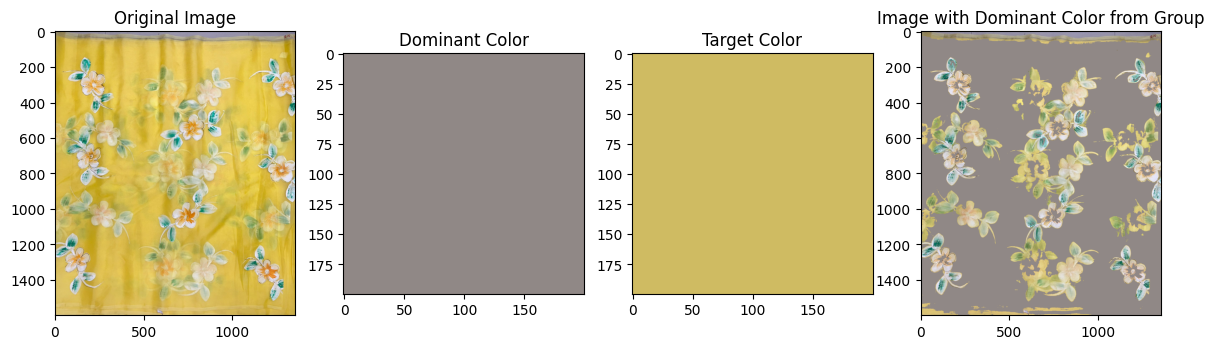

Target Color (image_single.jpg): [207 187  98]
Dominant Color (image_group.jpg): [144 136 134]


In [ ]:
import cv2
import numpy as np
from skimage.color import rgb2hsv, hsv2rgb
import matplotlib.pyplot as plt

def create_bar(height, width, color):
    bar = np.zeros((height, width, 3), np.uint8)
    bar[:] = color
    red, green, blue = int(color[2]), int(color[1]), int(color[0])
    return bar, (red, green, blue)

def find_dominant_color(img):
    # Calculate mean color
    mean_color = np.mean(img, axis=(0, 1))
    return mean_color.astype(int)

def replace_color(img, target_color, replacement_color, threshold=30):
    # Convert to HSV for better color comparison
    img_hsv = rgb2hsv(img)
    target_color_hsv = rgb2hsv(target_color)

    # Define a color range around the target color
    lower_bound = np.array([target_color_hsv[0] - threshold, 0.5, 0.5])
    upper_bound = np.array([target_color_hsv[0] + threshold, 1.0, 1.0])

    # Create a mask for pixels within the color range
    mask = cv2.inRange(img_hsv, lower_bound, upper_bound)

    # Replace the target color with the replacement color for the masked pixels
    img[mask > 0] = replacement_color
    return img
  # Load the image for extracting dominant colors (image_single.jpg)
img_single = cv2.imread('/content/Image/image_single.jpg')
img_single_rgb = cv2.cvtColor(img_single, cv2.COLOR_BGR2RGB)

# Load the image for extracting dominant colors (image_group.jpg)
img_group = cv2.imread('/content/Image/image_group.jpg')
img_group = cv2.cvtColor(img_group, cv2.COLOR_BGR2RGB)

# Get dominant color from image_group.jpg
dominant_color_group = find_dominant_color(img_group)

# Get target color from image_single.jpg
target_color_single = find_dominant_color(img_single_rgb)

# Replace the dominant color in the entire image_single.jpg with the dominant color from image_group.jpg
img_color_changed = replace_color(np.copy(img_single_rgb), target_color_single, dominant_color_group)

# Display the original image, dominant color, target color, and modified image
plt.figure(figsize=(18, 6))

# Original image
plt.subplot(1, 5, 1)
plt.imshow(img_single_rgb)
plt.title('Original Image')

# Dominant color visualization
plt.subplot(1, 5, 2)
dominant_bar, _ = create_bar(200, 200, dominant_color_group)
plt.imshow(dominant_bar)
plt.title('Dominant Color')

# Target color visualization
plt.subplot(1, 5, 3)
target_bar, _ = create_bar(200, 200, target_color_single)
plt.imshow(target_bar)
plt.title('Target Color')
# Image with changed dominant color
plt.subplot(1, 5, 4)
plt.imshow(img_color_changed)
plt.title('Image with Dominant Color from Group')

plt.show()

print("Target Color (image_single.jpg):", target_color_single)
print("Dominant Color (image_group.jpg):", dominant_color_group)

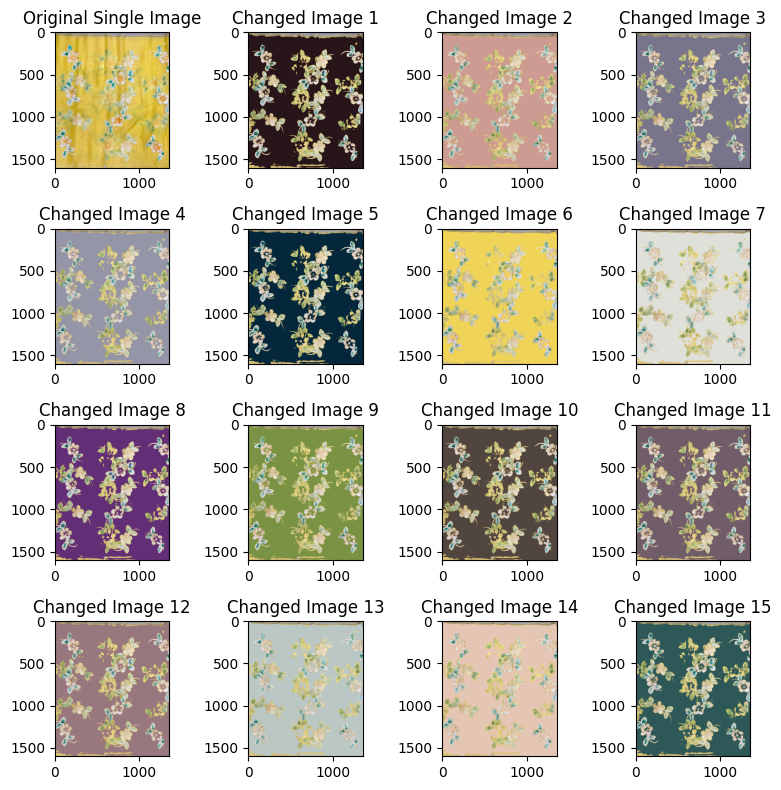

In [ ]:
import cv2
import numpy as np
from skimage.color import rgb2hsv, hsv2rgb
import matplotlib.pyplot as plt

def create_bar(height, width, color):
    bar = np.zeros((height, width, 3), np.uint8)
    bar[:] = color
    red, green, blue = int(color[2]), int(color[1]), int(color[0])
    return bar, (red, green, blue)

def find_dominant_colors(img, num_colors=15):
    # Reshape the image for k-means clustering
    data = np.reshape(img, (-1, 3)).astype(np.float32)

    # Perform k-means clustering to find dominant colors
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    flags = cv2.KMEANS_RANDOM_CENTERS
    _, _, centers = cv2.kmeans(data, num_colors, None, criteria, 10, flags)

    # Convert centers to uint8
    centers = np.uint8(centers)

    return centers

def replace_color(img, target_color, replacement_color, threshold=30):
    # Convert to HSV for better color comparison
    img_hsv = rgb2hsv(img)
    target_color_hsv = rgb2hsv(target_color)
   # Define a color range around the target color
    lower_bound = np.array([target_color_hsv[0] - threshold, 0.5, 0.5])
    upper_bound = np.array([target_color_hsv[0] + threshold, 1.0, 1.0])

    # Create a mask for pixels within the color range
    mask = cv2.inRange(img_hsv, lower_bound, upper_bound)

    # Replace the target color with the replacement color for the masked pixels
    img[mask > 0] = replacement_color
    return img

# Load the image for extracting dominant colors (image_single.jpg)
img_single = cv2.imread('/content/Image/image_single.jpg')
img_single_rgb = cv2.cvtColor(img_single, cv2.COLOR_BGR2RGB)

# Load the image for extracting dominant colors (image_group.jpg)
img_group = cv2.imread('/content/Image/image_group.jpg')
img_group = cv2.cvtColor(img_group, cv2.COLOR_BGR2RGB)

# Get the top 15 dominant colors from image_group.jpg
dominant_colors_group = find_dominant_colors(img_group, num_colors=15)

# Display the original single image
plt.figure(figsize=(8, 8))
plt.subplot(4, 4, 1)
plt.imshow(img_single_rgb)
plt.title('Original Single Image')

# Loop through each dominant color and create a changed version of single image
for i, dominant_color_group in enumerate(dominant_colors_group):
    # Replace the dominant color in the entire image_single.jpg with the current dominant color from image_group.jpg
    img_color_changed = replace_color(np.copy(img_single_rgb), find_dominant_color(img_single_rgb), dominant_color_group)

    # Display the changed image
    plt.subplot(4, 4, i + 2)
    plt.imshow(img_color_changed)
    plt.title(f'Changed Image {i + 1}')

plt.tight_layout()
plt.show()


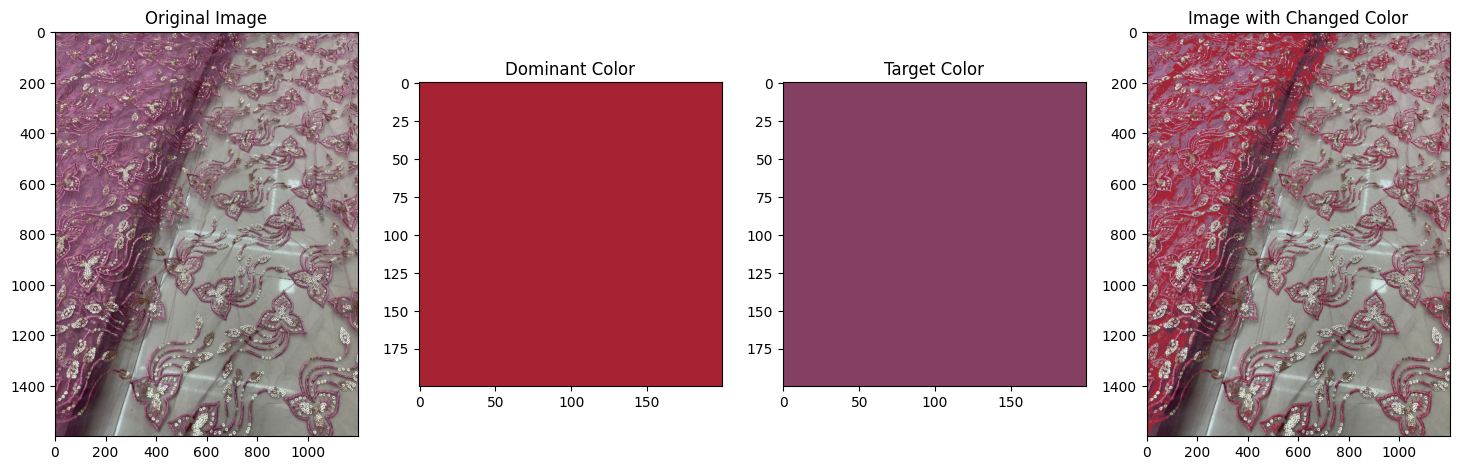

In [ ]:
import cv2
import numpy as np
from skimage.color import rgb2hsv, hsv2rgb

def change_color(img, target_color, replacement_color, threshold=30):
    # Convert to RGBA format
    img_rgba = cv2.cvtColor(img, cv2.COLOR_RGB2RGBA)

    # Calculate the Euclidean distance between each pixel color and the target color
    distances = np.linalg.norm(img_rgba[:, :, :3] - target_color, axis=-1)

    # Create a mask for pixels within the color range of the target color
    mask = distances <= threshold

    # Check if there are any pixels to replace
    if np.any(mask):
        # Replace the target color with the replacement color for the masked pixels
        img_rgba[mask] = np.concatenate([replacement_color, [255]])  # Add alpha channel

    # Convert back to RGB format
    img_rgb = cv2.cvtColor(img_rgba, cv2.COLOR_RGBA2RGB)

    return img_rgb

# Load the image for extracting dominant colors (image_single.jpg)
img_single = cv2.imread('/content/Image/A.jpg')
img_single_rgb = cv2.cvtColor(img_single, cv2.COLOR_BGR2RGB)

# Load the image for extracting dominant colors (image_group.jpg)
img_group = cv2.imread('/content/Image/GroupA.jpg')
img_group_rgb = cv2.cvtColor(img_group, cv2.COLOR_BGR2RGB)

# Get the dominant color from image_group.jpg
dominant_color_group = find_dominant_color(img_group_rgb)

# Get the target color from image_single.jpg
target_color_single = find_dominant_color(img_single_rgb)

# Change the color of image_single.jpg to the dominant color from image_group.jpg
img_color_changed = change_color(img_single_rgb, target_color_single, dominant_color_group, threshold=30)

# Display the original image, dominant color, target color, and modified image
plt.figure(figsize=(18, 6))

# Original image
plt.subplot(1, 4, 1)
plt.imshow(img_single_rgb)
plt.title('Original Image')

# Dominant color visualization
plt.subplot(1, 4, 2)
dominant_bar, _ = create_bar(200, 200, dominant_color_group)
plt.imshow(dominant_bar)
plt.title('Dominant Color')

# Target color visualization
plt.subplot(1, 4, 3)
target_bar, _ = create_bar(200, 200, target_color_single)
plt.imshow(target_bar)
plt.title('Target Color')

# Image with changed color
plt.subplot(1, 4, 4)
plt.imshow(img_color_changed)
plt.title('Image with Changed Color')

plt.show()


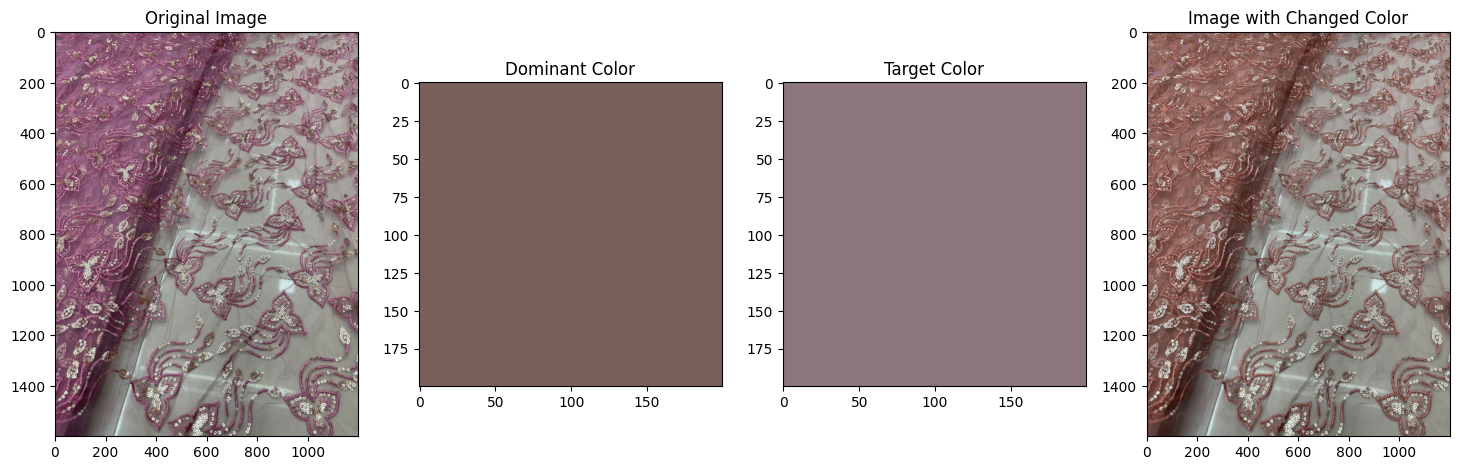

In [ ]:
import cv2
import numpy as np
from skimage.color import rgb2hsv, hsv2rgb

def change_color(img, target_color, replacement_color, threshold=30):
    # Convert to HSV for better color comparison
    img_hsv = rgb2hsv(img)
    target_color_hsv = rgb2hsv(target_color)
    replacement_color_hsv = rgb2hsv(replacement_color)

    # Create a mask for pixels within the color range of the target color
    mask = np.abs(img_hsv[:, :, 0] - target_color_hsv[0]) < threshold / 360.0

    # Check if there are any pixels to replace
    if np.any(mask):
        # Replace the target color with the replacement color for the masked pixels
        img_hsv[mask, 0] = replacement_color_hsv[0]

    # Convert back to RGB format
    img_rgb = hsv2rgb(img_hsv) * 255
    img_rgb = img_rgb.astype(np.uint8)

    return img_rgb

# Load the image for extracting dominant colors (A.jpg)
img_single = cv2.imread('/content/Image/A.jpg')
img_single_rgb = cv2.cvtColor(img_single, cv2.COLOR_BGR2RGB)

# Load the image for extracting dominant colors (GroupA.jpg)
img_group = cv2.imread('/content/Image/GroupA.jpg')
img_group_rgb = cv2.cvtColor(img_group, cv2.COLOR_BGR2RGB)

# Get the dominant color from GroupA.jpg
dominant_color_group = find_dominant_color(img_group_rgb)

# Get the target color from A.jpg
target_color_single = find_dominant_color(img_single_rgb)

# Change the color of A.jpg to the dominant color from GroupA.jpg
img_color_changed = change_color(img_single_rgb, target_color_single, dominant_color_group, threshold=30)

# Display the original image, dominant color, target color, and modified image
plt.figure(figsize=(18, 6))

# Original image
plt.subplot(1, 4, 1)
plt.imshow(img_single_rgb)
plt.title('Original Image')

# Dominant color visualization
plt.subplot(1, 4, 2)
dominant_bar, _ = create_bar(200, 200, dominant_color_group)
plt.imshow(dominant_bar)
plt.title('Dominant Color')

# Target color visualization
plt.subplot(1, 4, 3)
target_bar, _ = create_bar(200, 200, target_color_single)
plt.imshow(target_bar)
plt.title('Target Color')

# Image with changed color
plt.subplot(1, 4, 4)
plt.imshow(img_color_changed)
plt.title('Image with Changed Color')

plt.show()


In [ ]:
import cv2
import numpy as np
from skimage.color import rgb2hsv, hsv2rgb
from google.colab.patches import cv2_imshow

def change_color(img, target_color, replacement_color, threshold=30):
    # Convert to HSV for better color comparison
    img_hsv = rgb2hsv(img)
    target_color_hsv = rgb2hsv(target_color)
    replacement_color_hsv = rgb2hsv(replacement_color)

    # Create a mask for pixels within the color range of the target color
    mask = np.abs(img_hsv[:, :, 0] - target_color_hsv[0]) < threshold / 360.0

    # Check if there are any pixels to replace
    if np.any(mask):
        # Replace the target color with the replacement color for the masked pixels
        img_hsv[mask, 0] = replacement_color_hsv[0]

    # Convert back to RGB format
    img_rgb = hsv2rgb(img_hsv) * 255
    img_rgb = img_rgb.astype(np.uint8)

    return img_rgb

# Load the image for extracting dominant colors (A.jpg)
img_single = cv2.imread('/content/Image/A.jpg')
img_single_rgb = cv2.cvtColor(img_single, cv2.COLOR_BGR2RGB)

# Load the image for extracting dominant colors (GroupA.jpg)
img_group = cv2.imread('/content/Image/GroupA.jpg')
img_group_rgb = cv2.cvtColor(img_group, cv2.COLOR_BGR2RGB)

# Get the top 15 dominant colors from GroupA.jpg
dominant_colors_group = find_dominant_colors(img_group_rgb, num_colors=15)

# Display the original single image
cv2_imshow(img_single_rgb)

# Display the changed images
for i, dominant_color_group in enumerate(dominant_colors_group):
    # Replace the dominant color in A.jpg with the current dominant color from GroupA.jpg
    img_color_changed = change_color(np.copy(img_single_rgb), find_dominant_color(img_single_rgb), dominant_color_group, threshold=30)

    # Display the changed image
    cv2_imshow(img_color_changed)


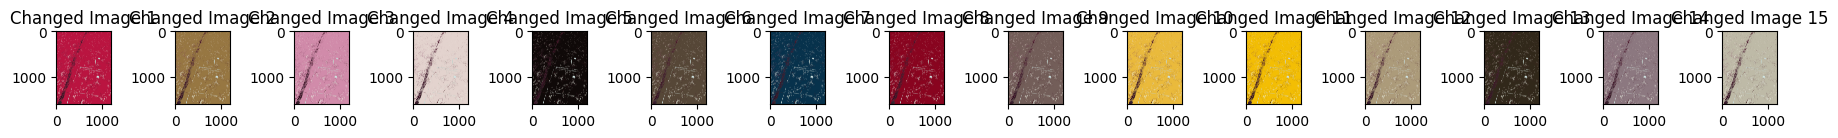

In [ ]:
import cv2
import numpy as np
from skimage.color import rgb2lab, lab2rgb
import matplotlib.pyplot as plt

def find_dominant_colors(img, num_colors=15):
    # Flatten the image to a 1D array
    pixels = img.reshape((-1, 3))

    # Use k-means clustering to find the dominant colors
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    _, _, centers = cv2.kmeans(np.float32(pixels), num_colors, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert centers to uint8
    dominant_colors = np.uint8(centers)

    return dominant_colors

def rgb_to_lab(img_rgb):
    # Convert RGB image to LAB color space
    img_lab = rgb2lab(img_rgb)
    return img_lab

def lab_to_rgb(img_lab):
    # Convert LAB image to RGB color space
    img_rgb = lab2rgb(img_lab)
    img_rgb = (img_rgb * 255).astype(np.uint8)
    return img_rgb

def change_color_lab(img_lab, target_color_lab, replacement_color_lab, threshold=30):
    # Calculate the Euclidean distance in LAB space
    distance = np.linalg.norm(img_lab - target_color_lab, axis=-1)

    # Create a mask for pixels within the color range
    mask = distance < threshold

    # Replace the target color with the replacement color for the masked pixels
    img_lab[mask] = replacement_color_lab

    return img_lab

# Load the image for extracting dominant colors (image_single.jpg)
img_single = cv2.imread('/content/Image/A.jpg')
img_single_rgb = cv2.cvtColor(img_single, cv2.COLOR_BGR2RGB)

# Load the image for extracting dominant colors (image_group.jpg)
img_group = cv2.imread('/content/Image/GroupA.jpg')
img_group = cv2.cvtColor(img_group, cv2.COLOR_BGR2RGB)

# Get the dominant colors from image_group.jpg and convert to LAB color space
dominant_colors_group = find_dominant_colors(img_group, num_colors=15)
dominant_colors_group_lab = rgb_to_lab(dominant_colors_group)

# Convert image_single.jpg to LAB color space
img_single_lab = rgb_to_lab(img_single_rgb)

# Create a plot for each dominant color in img_group
plt.figure(figsize=(18, 6))
num_dominant_colors = len(dominant_colors_group)

for i in range(num_dominant_colors):
    # Change the color of img_single.jpg to the current dominant color from img_group.jpg in LAB space
    img_color_changed_lab = change_color_lab(
        np.copy(img_single_lab),
        rgb_to_lab(np.array([find_dominant_color(img_single_rgb)])),
        dominant_colors_group_lab[i],
        threshold=30
    )

    # Convert the modified LAB image back to RGB color space
    img_color_changed_rgb = lab_to_rgb(img_color_changed_lab)

    # Display the changed image for the current dominant color
    plt.subplot(1, num_dominant_colors, i + 1)
    plt.imshow(img_color_changed_rgb)
    plt.title(f'Changed Image {i + 1}')

plt.tight_layout()
plt.show()


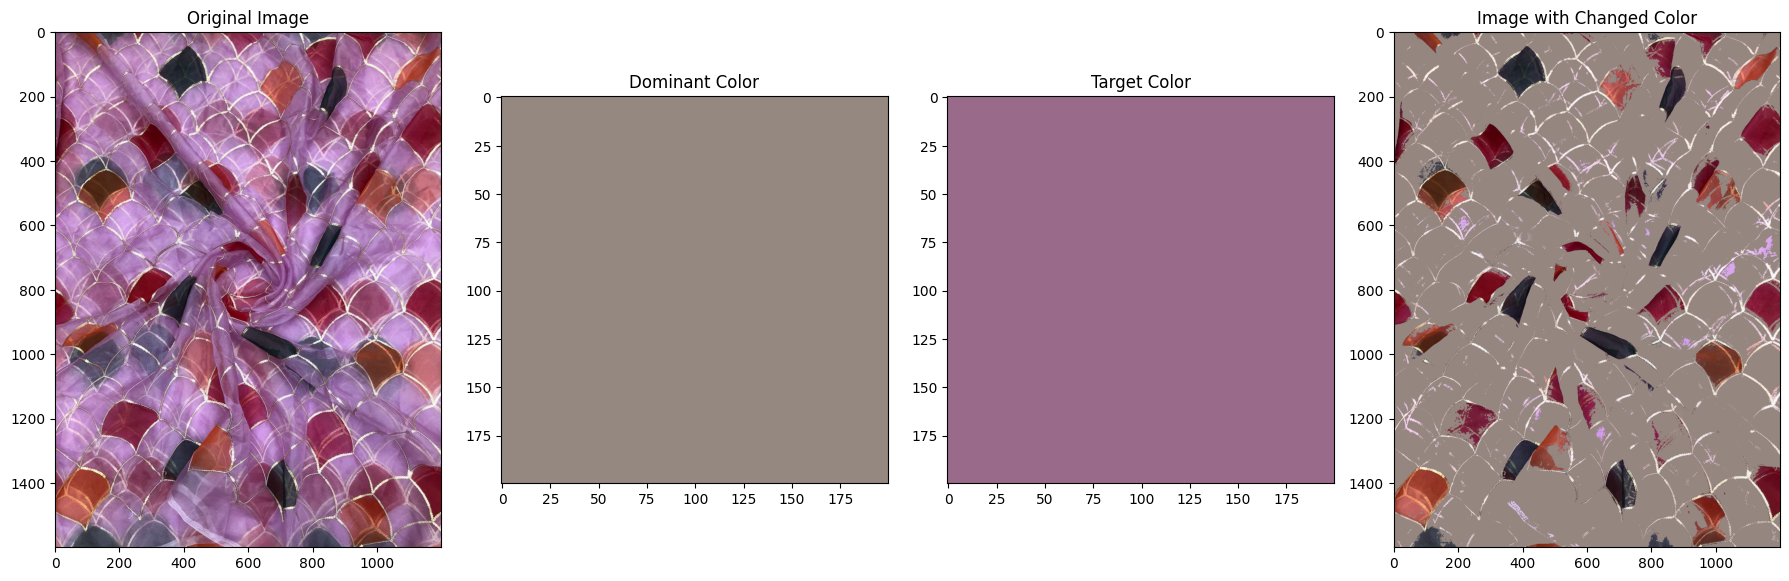

In [ ]:
import cv2
import numpy as np
from skimage.color import rgb2lab, lab2rgb
import matplotlib.pyplot as plt

def find_dominant_color(img):
    # Flatten the image to a 1D array
    pixels = img.reshape((-1, 3))

    # Use k-means clustering to find the dominant color
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    _, _, centers = cv2.kmeans(np.float32(pixels), 1, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert centers to uint8
    dominant_color = np.uint8(centers[0])

    return dominant_color

def rgb_to_lab(img_rgb):
    # Convert RGB image to LAB color space
    img_lab = rgb2lab(img_rgb)
    return img_lab

def lab_to_rgb(img_lab):
    # Convert LAB image to RGB color space
    img_rgb = lab2rgb(img_lab)
    img_rgb = (img_rgb * 255).astype(np.uint8)
    return img_rgb

def change_color_lab(img_lab, target_color_lab, replacement_color_lab, threshold=30):
    # Calculate the Euclidean distance in LAB space
    distance = np.linalg.norm(img_lab - target_color_lab, axis=-1)

    # Create a mask for pixels within the color range
    mask = distance < threshold

    # Replace the target color with the replacement color for the masked pixels
    img_lab[mask] = replacement_color_lab

    return img_lab

# Load the image for extracting dominant colors (image_single.jpg)
img_single = cv2.imread('/content/Image/B.jpg')
img_single_rgb = cv2.cvtColor(img_single, cv2.COLOR_BGR2RGB)

# Load the image for extracting dominant colors (image_group.jpg)
img_group = cv2.imread('/content/Image/GroupB.jpg')
img_group = cv2.cvtColor(img_group, cv2.COLOR_BGR2RGB)

# Get the dominant color from image_group.jpg and convert to LAB color space
dominant_color_group = find_dominant_color(img_group)
dominant_color_group_lab = rgb_to_lab(np.array([dominant_color_group]))

# Get the target color from image_single.jpg and convert to LAB color space
target_color_single = find_dominant_color(img_single_rgb)
target_color_single_lab = rgb_to_lab(np.array([target_color_single]))

# Convert image_single.jpg to LAB color space
img_single_lab = rgb_to_lab(img_single_rgb)

# Change the color of image_single.jpg to the dominant color from image_group.jpg in LAB space
img_color_changed_lab = change_color_lab(img_single_lab, target_color_single_lab, dominant_color_group_lab, threshold=30)

# Convert the modified LAB image back to RGB color space
img_color_changed_rgb = lab_to_rgb(img_color_changed_lab)

# Display the original image, dominant color, target color, and modified image
plt.figure(figsize=(18, 6))

# Original image
plt.subplot(1, 4, 1)
plt.imshow(img_single_rgb)
plt.title('Original Image')

# Dominant color visualization
plt.subplot(1, 4, 2)
dominant_bar, _ = create_bar(200, 200, dominant_color_group)
plt.imshow(dominant_bar)
plt.title('Dominant Color')

# Target color visualization
plt.subplot(1, 4, 3)
target_bar, _ = create_bar(200, 200, target_color_single)
plt.imshow(target_bar)
plt.title('Target Color')

# Image with changed color
plt.subplot(1, 4, 4)
plt.imshow(img_color_changed_rgb)
plt.title('Image with Changed Color')

plt.tight_layout()
plt.show()


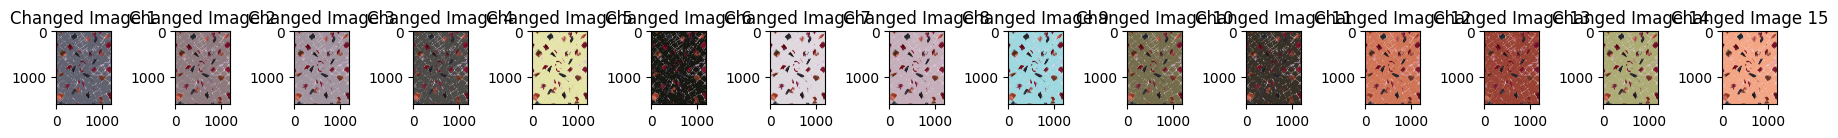

In [ ]:
import cv2
import numpy as np
from skimage.color import rgb2lab, lab2rgb
import matplotlib.pyplot as plt

def find_dominant_colors(img, num_colors=15):
    # Flatten the image to a 1D array
    pixels = img.reshape((-1, 3))

    # Use k-means clustering to find the dominant colors
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    _, _, centers = cv2.kmeans(np.float32(pixels), num_colors, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert centers to uint8
    dominant_colors = np.uint8(centers)

    return dominant_colors

def rgb_to_lab(img_rgb):
    # Convert RGB image to LAB color space
    img_lab = rgb2lab(img_rgb)
    return img_lab

def lab_to_rgb(img_lab):
    # Convert LAB image to RGB color space
    img_rgb = lab2rgb(img_lab)
    img_rgb = (img_rgb * 255).astype(np.uint8)
    return img_rgb

def change_color_lab(img_lab, target_color_lab, replacement_color_lab, threshold=30):
    # Calculate the Euclidean distance in LAB space
    distance = np.linalg.norm(img_lab - target_color_lab, axis=-1)

    # Create a mask for pixels within the color range
    mask = distance < threshold

    # Replace the target color with the replacement color for the masked pixels
    img_lab[mask] = replacement_color_lab

    return img_lab

# Load the image for extracting dominant colors (image_single.jpg)
img_single = cv2.imread('/content/Image/B.jpg')
img_single_rgb = cv2.cvtColor(img_single, cv2.COLOR_BGR2RGB)

# Load the image for extracting dominant colors (image_group.jpg)
img_group = cv2.imread('/content/Image/GroupB.jpg')
img_group = cv2.cvtColor(img_group, cv2.COLOR_BGR2RGB)

# Get the dominant colors from image_group.jpg and convert to LAB color space
dominant_colors_group = find_dominant_colors(img_group, num_colors=15)
dominant_colors_group_lab = rgb_to_lab(dominant_colors_group)

# Convert image_single.jpg to LAB color space
img_single_lab = rgb_to_lab(img_single_rgb)

# Create a plot for each dominant color in img_group
plt.figure(figsize=(18, 6))
num_dominant_colors = len(dominant_colors_group)

for i in range(num_dominant_colors):
    # Change the color of img_single.jpg to the current dominant color from img_group.jpg in LAB space
    img_color_changed_lab = change_color_lab(
        np.copy(img_single_lab),
        rgb_to_lab(np.array([find_dominant_color(img_single_rgb)])),
        dominant_colors_group_lab[i],
        threshold=30
    )

    # Convert the modified LAB image back to RGB color space
    img_color_changed_rgb = lab_to_rgb(img_color_changed_lab)

    # Display the changed image for the current dominant color
    plt.subplot(1, num_dominant_colors, i + 1)
    plt.imshow(img_color_changed_rgb)
    plt.title(f'Changed Image {i + 1}')

plt.tight_layout()
plt.show()
